# Introduction

This is a tutorial for using Forest to analyze Beiwe data. We will also be creating some time series plots using the generated statistic summaries. There are four parts to this tutorial.

1. Check Python version and download Forest.
2. Download sample data.
3. Process data using forest.
4. Creating time series plots. 

## Check Python Version and Download Forest

Before we begin, we need to check the current distribution of Python. Note that forest is built using Python 3.8. 

In [1]:
from platform import python_version
import sys

- Print the python version and the path to the Python interpreter. 

In [2]:
print(python_version()) ## Prints your version of python
print(sys.executable) ## Prints your current python installation

3.8.12
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/bin/python


*The output should display two lines.* 

1. The Python version installed- make sure you are not using a version of Python that is earlier than 3.8
2. The path to where Python is currently installed

- You may need to install git, pip, and forest. To do so, enter the lines below in a command-line shell. If not, you can skip to the next step. 

In [ ]:
# conda install git pip
# pip install git+git://github.com/onnela-lab/forest.git@main

## Download Sample Data


For this tutorial, we will be using publically released data from the Beiwe Research Platform that is available through Zenodo. The Beiwe Research Platform collects high-density data from a variety of smartphone sensors including GPS, WiFi, Bluetooth, and accelerometer. Further information on the dataset and Beiwe can be found https://github.com/mkiang/beiwe_data_sample.

In [3]:
import wget
import zipfile
import os

- For **source_url**, enter the "url to the dataset". 
- For **dest_dir**, enter the "path to the destination folder". 

In [4]:
source_url = "https://zenodo.org/record/1188879/files/data.zip?download=1"
dest_dir = os.getcwd()
zip_fpath = wget.download(source_url, out = dest_dir)

100% [..................................................] 775681924 / 775681924

*The output should display the download progress if this code is running correctly. Note this is a large data file (~740 MB of data). This will take betwen ten minutes and an hour or more, depending on the speed of your internet connection. Once the download is complete, a zip file should be saved in the destination folder.*

- Unzip the file downloaded in the previous block into a folder called **data**. The subfolders in this directory contain data produced by the Beiwe app.

In [5]:
with zipfile.ZipFile(zip_fpath, 'r') as zip_ref:
    zip_ref.extractall(dest_dir)

- Remove the downloaded zip file to save space on your computer

In [6]:
 os.remove(zip_fpath)

- Verify that the process of downloading and unzipping the data is complete.

In [7]:
# check the unzipped dir exists 
data_dir = "data"
if os.path.isdir(data_dir):
    print("Data Successfully Downloaded and Unzipped")

Data Successfully Downloaded and Unzipped


*The output should say "Data Successfully Downloaded and Unzipped" if this code was successful.*

## Process Data using Forest 
- Using the Forest library developed by the Onnela lab, we compute daily GPS and communication summary statistics

First, we generate the GPS-related summary statistics by using the **gps_stats_main** function under the **traj2stat.py** in the Jasmine tree of Forest. This code will take about 15-30 minutes to run, depending on your machine.

- For **data_dir**, enter the "path to the data file directory". 
- For **output_dir**, enter the "path to the file directory where output is to be stored". 
- For **tz_str**, enter the time zone where the study was conducted. Here, it's **"America/New_York."** We can use "pytz.all_timezones" to check all options.
- For **options**, there are 'daily' or 'hourly' or 'both' for the temporal resolution for summary statistics. Here, we chose **"daily."**
- For **save_traj**, it's "True" if you want to save the trajectories as a csv file, "False" if you don't (default: False). Here, we chose **"True."**

In [6]:
import forest.jasmine.traj2stats

data_dir = "data/onnela_lab_gps_testing"
output_dir = "gps_output"
tz_str = "America/New_York"
option = "daily"
save_traj = True 

forest.jasmine.traj2stats.gps_stats_main(data_dir, output_dir, tz_str, option, save_traj)

User: 6b38vskd
Read in the csv files ...


/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:

/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:

/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:

/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:

/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:

/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:

/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hour_data,ignore_index=True)
/Volumes/SanDisk/opt/anaconda3/envs/python_3_8/lib/python3.8/site-packages/forest/poplar/legacy/common_funcs.py:

Collapse data within 10 second intervals ...
Extract flights and pauses ...
Infer unclassified windows ...
Merge consecutive pauses and bridge gaps ...
Selecting basis vectors ...
Imputing missing trajectories ...
Tidying up the trajectories...
Calculating the daily summary stats...


*The output should describe how the data is being processed. If this is working correctly, you will see something like:*
    
><i>User: tcqrulfj  
Read in the csv files ...  
Collapse data within 10 second intervals ...  
Extract flights and pauses ...  
Infer unclassified windows ...  
Merge consecutive pauses and bridge gaps ...  
Selecting basis vectors ...  
Imputing missing trajectories ...  
Tidying up the trajectories...  
Calculating the daily summary stats...<i>

Second, we compute the call and text-based summary statistics by using the **log_stats_main** function under the **log_stats.py** in the Willow tree of Forest  

- For **data_dir**, enter the "path to the data file directory". 
- For **output_dir**, enter the "path to the file directory where output is to be stored". 
- For **tz_str**, enter the time zone where the study was conducted. Here, it's **"America/New_York."** 
- For **options**, it's 'daily' or 'hourly' or 'both' for the temporal resolution for summary statistics. Here, we chose **"daily."**

In [7]:
import forest.willow.log_stats

data_dir = "data/onnela_lab_gps_testing"
output_dir = "comm_output"
tz_str = "America/New_York"
option = "daily"

forest.willow.log_stats.log_stats_main(data_dir, output_dir, tz_str, option)


User: 6b38vskd
User 6b38vskd : texts data are not collected.
Data imported ...
An error occured when processing the data.


*The output should describe how the data is being processed (e.g., read, collapse, extracted...imputing, tidying, and calculating daily summary stats).*

>*Note- this isn't currently working on our sample dataset.*

The outputs of **gps_stats_main** and **log_stats_main** are generated with respect to each suject in the study folder. 
- The following code is  used to concatenate these files into a single csv for the **GPS summaries**.

In [8]:
import numpy as np
import pandas as pd
import os
import sys
from pathlib import Path
from datetime import datetime
from datetime import timedelta  
import math
from functools import reduce

# Path to subdirectory
direc = os.getcwd()
data_dir = os.path.join(direc,"gps_output")


# initialize dataframe list
df_list = []

# loop through all directories - select folder
for subdir, dirs, files in os.walk(data_dir):
    
    # loop through files in list
    for file in files:
        # obtain subject study_id 
        file_dir = os.path.join(data_dir,file)
        subject_id = os.path.basename(file_dir)[:-4]
        if file[-4:] == ".csv":# only read in csv files
            temp_df = pd.read_csv(file_dir)
            temp_df.insert(loc=0, column="Date", value=pd.to_datetime(temp_df[['day', 'month', 'year']]))
            temp_df.insert(loc=0, column='Beiwe_ID', value=subject_id)
            df_list.append(temp_df)
            
if len(df_list) > 0:
                
    # concatenate dataframes within list --> Final Data for trajectories
    response_data = pd.concat(df_list, axis=0).reset_index()
    response_data = response_data.drop(['index','day', 'month', 'year'], axis=1)

    # print few few observations
    print(response_data.head())

    # Write results to CSV 
    response_filename = 'gps_summary.csv'

    path_resp = os.path.join(direc, response_filename)    

    # write to csv
    response_data.to_csv(path_resp, index=False)
else:
    print("Error: No data found")

   Beiwe_ID       Date  obs_duration    obs_day  obs_night  home_time  \
0  6b38vskd 2016-01-26      8.897222   3.202778   5.694444   1.494444   
1  6b38vskd 2016-01-27     23.026389  10.475000  12.551389   0.000000   
2  6b38vskd 2016-01-28     21.131944   8.658333  12.473611   0.000000   
3  6b38vskd 2016-01-29     23.386111  11.475000  11.911111   0.000000   
4  6b38vskd 2016-01-30     23.769444  11.869444  11.900000   0.000000   

   dist_traveled  max_dist_home    radius  diameter  num_sig_places   entropy  \
0         18.403       6.174510  2.298990  6.965317               3  0.900776   
1         11.003       2.051055  0.588324  2.624131               4  0.658586   
2         25.422       6.187269  2.531129  6.570162               4  1.030304   
3         24.096       6.305391  2.581244  6.616111               2  0.613772   
4          5.344       1.196300  0.082612  1.229596               3  0.221864   

   total_flight_time  av_flight_length  sd_flight_length  av_flight_durati

*The output should show the data for the first five observations in the concatenated dataset.*

- The following code is  used to concatenate these files into a single csv for the **communication summaries**.

In [9]:
# (use study_id and timestamp)
# Path to subdirectory
direc = os.getcwd()
data_dir = os.path.join(direc,"comm_output")


# initialize dataframe list
df_list = []

# loop through all directories - select folder
for subdir, dirs, files in os.walk(data_dir):
    
    # loop through files in list
    for file in files:
        # obtain patient study_id 
        file_dir = os.path.join(data_dir,file)
        print(file_dir)
        subject_id = os.path.basename(file_dir)[:-4]
        if file[-4:] == ".csv":
            temp_df = pd.read_csv(file_dir)
            temp_df.insert(loc=0, column="Date", value=pd.to_datetime(temp_df[['day', 'month', 'year']]))
            temp_df.insert(loc=0, column='Beiwe_ID', value=subject_id)
            df_list.append(temp_df)
                
# concatenate dataframes within list --> Final Data for trajectories
if len(df_list) > 0:
    response_data = pd.concat(df_list, axis=0).reset_index()
    response_data = response_data.drop(['index','day', 'month', 'year'], axis=1)

    # print few few observations
    print(response_data.head())

    # Write results to CSV 
    response_filename = 'comm_summary.csv'

    path_resp = os.path.join(direc, response_filename)    

    # write to csv
    response_data.to_csv(path_resp, index=False)
else:
    print("Error: No data found")

Error: No data found


*The output should show the data for the first five observations in the concatenated dataset.*

## Plot Data

Now, we will also be generate some time series plots using the generated statistic summaries.
- To read the file, we need to define **response_filename** with the concatenated dataset. Here, we are using 'gps_summary.csv'.

In [30]:
import matplotlib.pyplot as plt
import os
import pandas as pd

direc = os.getcwd()
response_filename = 'gps_summary.csv'
path_resp = os.path.join(direc, response_filename)    

# read data
response_data = pd.read_csv(path_resp)


The data needs to be sorted according to date. The following code will sort and create 4 even time intervals in the plot. 

In [1]:
## Make sure the data is sorted according to date
response_data.sort_values('Date', inplace = True)
response_data.reset_index(drop = True, inplace = True)

def time_series_plot(var_to_plot, ylab = '', xlab = 'Date', num_x_ticks = 4):
    for key, grp in response_data.groupby(['Beiwe_ID']):
        plt.plot(response_data.Date, response_data[var_to_plot], label=key)
    
    #if len(response_data['Beiwe_ID'].unique()) > 1: ## more than one user to plot
    #    plt.plot(response_data.Date, response_data[var_to_plot], c=response_data['Beiwe_ID'].astype('category'))
    #else:
    #    plt.plot(response_data.Date, response_data[var_to_plot]) #just one user
    title = f"Time Series Plot of {var_to_plot}"
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
    ## get evenly indices
    tick_indices = [(i * (len(response_data.Date.unique()) - 1)) // (num_x_ticks - 1) for i in range(num_x_ticks) ]
    
    plt.xticks(response_data.Date.unique()[tick_indices])
    plt.show()

NameError: name 'response_data' is not defined

- You can now create time series plots using **time_series_plot('variable')**.

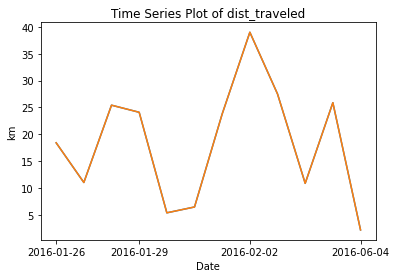

In [31]:
time_series_plot('dist_traveled', ylab = "km")

*The output displays a time series plot for the variable, "dist_traveled."*

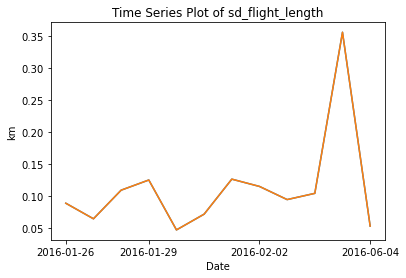

In [32]:
time_series_plot('sd_flight_length', ylab = "km")

*The output displays a time series plot for the variable, "sd_flight_length."*